### Universidad del Valle de Guatemala
#### Brandon Ronaldo Sicay Cumes - 21757

repositorio: https://github.com/bsicay/Cifrados-UVG/tree/main/LABS/LAB2/B
chat: https://chatgpt.com/c/679043bd-6990-800f-8b61-e48f1ddf164c


#### **Problemas a resolver**


2. Dada la imagen XOR_Imagen, y la llave “cifrados_2025” encontrar el valor original de la
imagen.

a. Deben de convertir la imagen a base 64 y aplicarle un xor con la llave para
encontrar su valor

In [1]:
from ascii_to_bin import *
from bin_to_ascii import *
from ascii_to_base64 import ascii_to_base64
from base64_to_bin import * 
from base64_to_ascii import *
from bin_to_base64 import *
from xor import *
import base64
from IPython.display import display, Image


/9j/4QC8RXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABgAAkAcABAAAADAyMTABkQcABAAAAAECAwAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAAAEAAADoAQAAQAAAAAEAAAAAAAA/+IB8ElDQ19QUk9GSUxFAAEBAAAB4GxjbXMEIAAAbW50clJHQiBYWVogB+IAAwAUAAkADgAdYWNzcE1TRlQAAAAAc2F3c2N0cmwAAAAAAAAAAAAAAAAAAPbWAAEAAAAA0y1oYW5keem/Vlo+AbaDI4VVRvdPqgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKZGVzYwAAAPwAAAAkY3BydAAAASAAAAAid3RwdAAAAUQAAAAUY2hhZAAAAVgAAAAsclhZWgAAAYQAAAAUZ1hZWgAAAZgAAAAUYlhZWgAAAawAAAAUclRSQwAAAcAAAAAgZ1RSQwAAAcAAAAAgYlRSQwAAAcAAAAAgbWx1YwAAAAAAAAABAAAADGVuVVMAAAAIAAAAHABzAFIARwBCbWx1YwAAAAAAAAABAAAADGVuVVMAAAAGAAAAHABDAEMAMAAAWFlaIAAAAAAAAPbWAAEAAAAA0y1zZjMyAAAAAAABDD8AAAXd///zJgAAB5AAAP2S///7of///aIAAAPcAADAcVhZWiAAAAAAAABvoAAAOPIAAAOPWFlaIAAAAAAAAGKWAAC3iQAAGNpYWVogAAAAAAAAJKAAAA+FAAC2xHBhcmEAAAAAAAMAAAACZmkAAPKnAAANWQAAE9AAAApb/9sAQwABAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEB

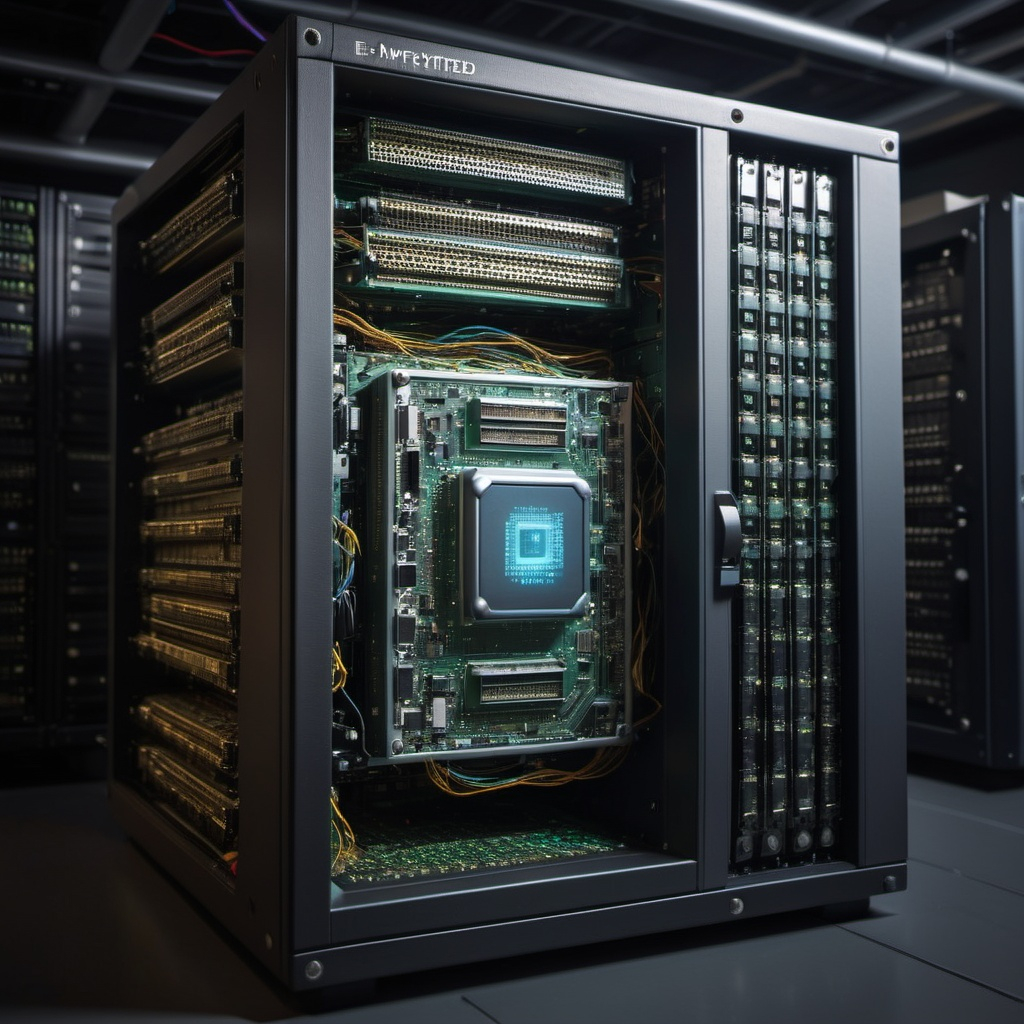

In [2]:
def image_to_base64(image_path):
    """
    Lee la imagen en modo binario y la convierte a una cadena Base64.
    """
    with open(image_path, "rb") as f:
        image_data = f.read()
    # Codifica la imagen en base64 (devuelve bytes) y luego la decodifica a UTF-8.
    return base64.b64encode(image_data).decode('utf-8')



def recover_image(image_path, key, output_path):
    """
    Dada una imagen cifrada (imagen XOR) y una llave, realiza los siguientes pasos:
      1. Convierte la imagen a Base64.
      2. Aplica XOR con la llave para recuperar la cadena Base64 original.
      3. Decodifica la cadena Base64 para obtener los bytes originales de la imagen.
      4. Guarda la imagen recuperada en 'output_path'.
    """
    # Convertir imagen a Base64
    b64_str = image_to_base64(image_path)
    # base64 a binario 
    bin_image = base64_to_binary(b64_str)
    # llave a binario 
    bin_key = ascii_to_bin(key)
    # Aplicar XOR con la llave
    xor_result = xor_binaries(bin_image, bin_key)
    # cadena Base64 original.
    original_b64 = bin_to_base64(xor_result) 
    # Decodificar la cadena Base64 para obtener los bytes de la imagen original.
    original_image_bytes = base64.b64decode(original_b64)
    # Guardar la imagen recuperada.
    with open(output_path, "wb") as f:
        f.write(original_image_bytes)
    print(f"Imagen recuperada guardada en: {output_path}")


# Nombre del archivo de la imagen cifrada
input_image = "imagen_xor.png"
# Llave para aplicar XOR
key = "cifrados_2025"
# Archivo de salida para la imagen recuperada
output_image = "imagen_recuperada.png"

recover_image(input_image, key, output_image)
display(Image(filename="imagen_recuperada.png"))


3. Investigar porque al aplicar XOR con una llave de texto la imagén se corrompe.

Al momento de aplicar la operación de XOR sobre una imagen con una llave de texto esta se puede ver corrompida debido a la forma en la que esta operación se realiza directamente sobre toda la información de la imagen.

-   Desalineación de longitudes:
La imagen es un archivo binario que, al convertirlo a una cadena (por ejemplo, en Base64 o a una representación binaria), tiene una longitud fija. Si la llave en forma de texto no se extiende correctamente para igualar esa longitud, el XOR se aplica de forma errónea en ciertos bloques, provocando corrupción en los datos resultantes.

- Conversión y codificación:
Una llave en texto debe convertirse a su representación binaria de forma consistente (por ejemplo, utilizando UTF-8 o ASCII). Si la conversión no es coherente con la forma en que se representa el archivo (o si se mezclan diferentes codificaciones), los bits generados no coincidirán con la estructura original del archivo de imagen.

- Estructura interna del archivo:
Los archivos de imagen suelen tener cabeceras y metadatos que requieren estar en un formato específico. Aplicar XOR de forma indiscriminada a todo el archivo (incluyendo la cabecera) puede corromper esos datos críticos, haciendo que el archivo no se pueda interpretar correctamente.

- Manejo incorrecto del padding o extensión:
Si al repetir la llave no se respeta la alineación correcta de los bits, o si se usa un método de extensión que no preserva la estructura binaria, se producirá una mezcla incorrecta de datos.

 para este caso al momento de hacer el cifrado con la información completa de toda la imagen, esta puede perder la información esencial del formato y del header. Como: 

4. Investigar como aplicar un xor a 2 imagnes. Para esto deben de eleccionar 2 imágenes,
luego proceder hacer un xor entre las dos imágenes. Esto significa que una imagen es la
original y la otra se utilizará como llave para aplicar el xor.

Mostrar las imágenes utilizadas y el resultado, asi mismo explique que
inconvenientes encontro al momento de realizar el xor

In [3]:
from PIL import Image
import base64
import numpy as np
import matplotlib.pyplot as plt


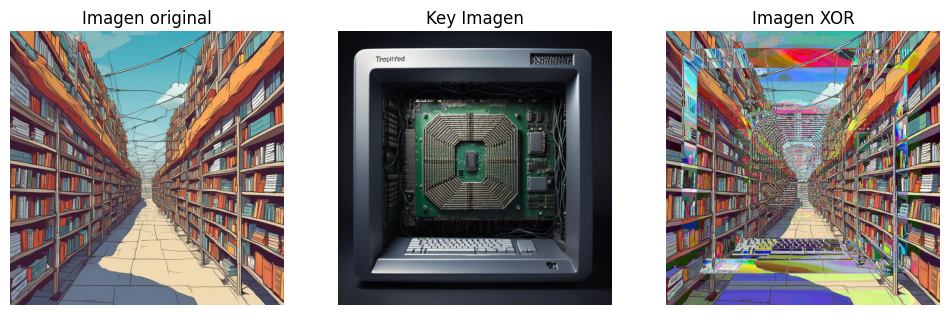

In [11]:
def apply_xor_to_images(image_path1, image_path2):
    img1 = Image.open(image_path1)
    img2 = Image.open(image_path2)
    img2 = img2.resize(img1.size)

    
    array1 = np.array(img1)
    array2 = np.array(img2)
    
    result_array = np.bitwise_xor(array1, array2)

    result_img = Image.fromarray(result_array)
    result_img.save('resultado_xor.png')

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].imshow(img1)
    axs[0].set_title("Imagen original")
    axs[0].axis("off")

    axs[1].imshow(img2)
    axs[1].set_title("Key Imagen")
    axs[1].axis("off")

    axs[2].imshow(result_img, cmap="gray")
    axs[2].set_title("Imagen XOR")
    axs[2].axis("off")


apply_xor_to_images('./ejemplo_merge/imagen3.jpg','./ejemplo_merge/imagen4.jpg')


Una de las complicaciones que se tuvieron al realizar el XOR fue que las imagenes tenia que tener el mismo tamaño para que la cantidad de bits a operar fuera la misma en ambas imagenes. Otra cosa que habia que tener el cuenta es que si las imagenes era a color o en blanco y negro. Esta ultima era bastante importante debido a que los colores le añaden otra dimension a los bits, hace que las imagenes no puedan ser operadas.
